# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import seaborn as sns
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port blair
Processing Record 2 of Set 1 | hotan
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | puerto baquerizo moreno
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | kalemie
Processing Record 8 of Set 1 | itoman
Processing Record 9 of Set 1 | sao tome
Processing Record 10 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 11 of Set 1 | minas de marcona
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | chonchi
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | tromso
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | puerto deseado
Processing Record 21 of Set 1 | blackmans bay
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port blair,11.6667,92.7500,81.43,75,52,10.76,IN,1732216589
1,hotan,37.0997,79.9269,43.23,48,100,2.10,CN,1732216590
2,wailua homesteads,22.0669,-159.3780,75.99,87,20,6.91,US,1732216591
3,puerto baquerizo moreno,-0.9000,-89.6000,81.59,54,40,11.50,EC,1732216592
4,port-aux-francais,-49.3500,70.2167,39.60,82,87,38.97,TF,1732216593


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port blair,11.6667,92.7500,81.43,75,52,10.76,IN,1732216589
1,hotan,37.0997,79.9269,43.23,48,100,2.10,CN,1732216590
2,wailua homesteads,22.0669,-159.3780,75.99,87,20,6.91,US,1732216591
3,puerto baquerizo moreno,-0.9000,-89.6000,81.59,54,40,11.50,EC,1732216592
4,port-aux-francais,-49.3500,70.2167,39.60,82,87,38.97,TF,1732216593


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

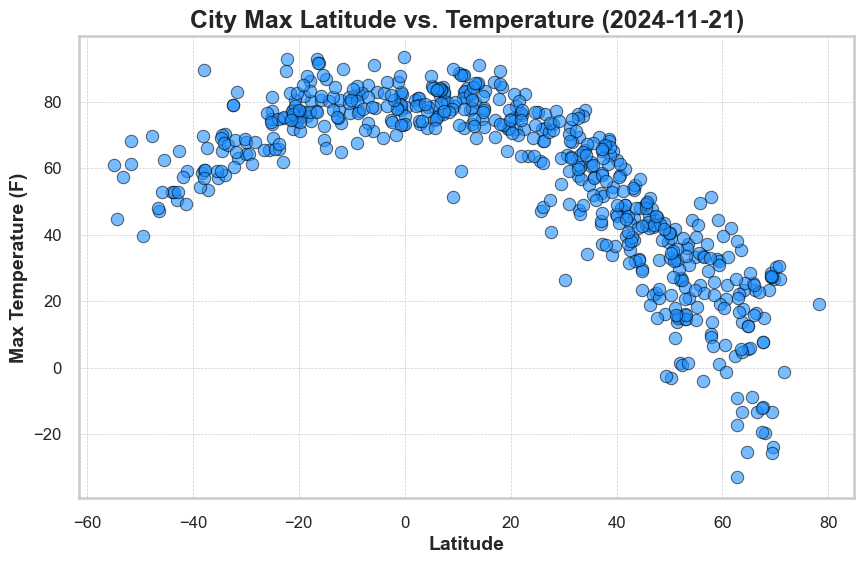

In [8]:
# Build scatter plot for latitude vs. temperature
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Lat", 
    y="Max Temp", 
    data=city_data_df, 
    s=80, 
    color="dodgerblue", 
    edgecolor="black", 
    alpha=0.6
)
current_date = datetime.now().strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({current_date})", fontsize=18, weight='bold')
plt.xlabel("Latitude", fontsize=14, weight='bold')
plt.ylabel("Max Temperature (F)", fontsize=14, weight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

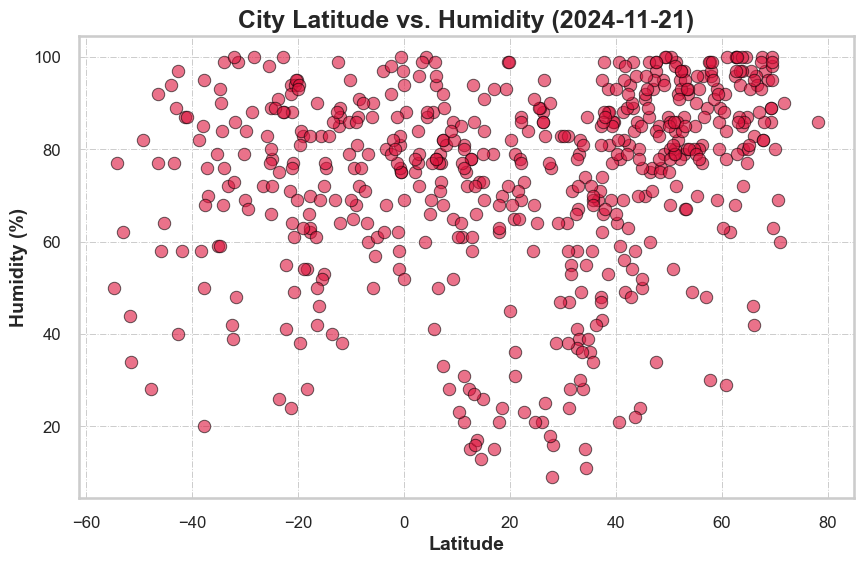

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Lat", 
    y="Humidity", 
    data=city_data_df, 
    s=80, 
    color="crimson", 
    edgecolor="black", 
    alpha=0.6
)
plt.title(f"City Latitude vs. Humidity ({current_date})", fontsize=18, weight='bold')
plt.xlabel("Latitude", fontsize=14, weight='bold')
plt.ylabel("Humidity (%)", fontsize=14, weight='bold')
plt.grid(True, linestyle='-.', linewidth=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

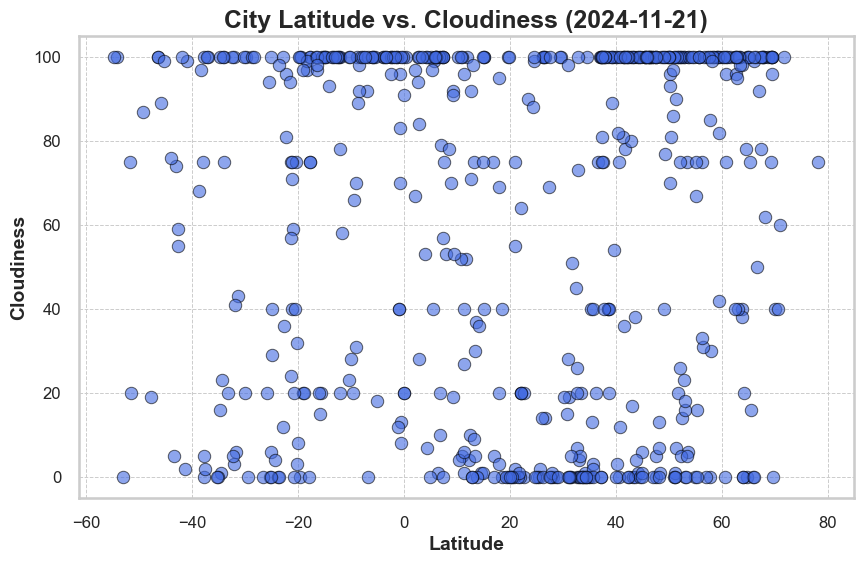

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Lat", 
    y="Cloudiness", 
    data=city_data_df, 
    s=80, 
    color="royalblue", 
    edgecolor="black", 
    alpha=0.6
)
plt.title(f"City Latitude vs. Cloudiness ({current_date})", fontsize=18, weight='bold')
plt.xlabel("Latitude", fontsize=14, weight='bold')
plt.ylabel("Cloudiness", fontsize=14, weight='bold')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

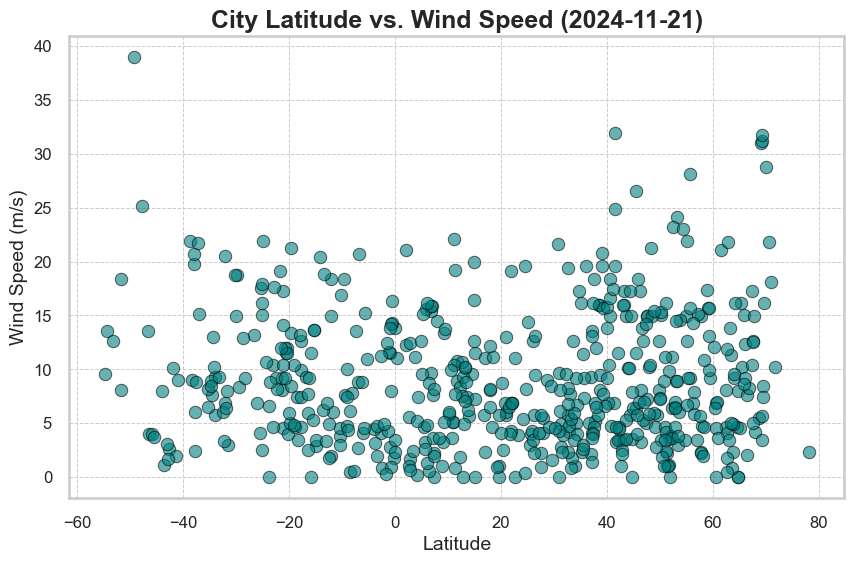

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Lat", 
    y="Wind Speed", 
    data=city_data_df, 
    s=80, 
    color="teal", 
    edgecolor="black", 
    alpha=0.6
)
plt.title(f"City Latitude vs. Wind Speed ({current_date})", fontsize=18, weight='bold')
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (m/s)", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel): # This will let me choose my own labels. Fancy!
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    print(f"The r^2-value is: {(r_value**2):.2f}")

    plt.figure(figsize=(8, 4))
    scatterplot = sns.scatterplot(x=x_values, y=y_values, color='dodgerblue', edgecolor='black', s=80, alpha=0.6)
    plt.plot(x_values, regress_values, color='red')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=16, weight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    scatterplot.text(0.5, 0.05, equation_text, transform=scatterplot.transAxes, fontsize=14,
            verticalalignment='bottom', horizontalalignment='center', color='black', weight='bold', bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port blair,11.6667,92.7500,81.43,75,52,10.76,IN,1732216589
1,hotan,37.0997,79.9269,43.23,48,100,2.10,CN,1732216590
2,wailua homesteads,22.0669,-159.3780,75.99,87,20,6.91,US,1732216591
5,anadyr,64.7500,177.4833,5.50,77,0,8.01,RU,1732216595
7,itoman,26.1247,127.6694,68.02,88,100,12.66,JP,1732216597


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto baquerizo moreno,-0.9000,-89.6000,81.59,54,40,11.50,EC,1732216592
4,port-aux-francais,-49.3500,70.2167,39.60,82,87,38.97,TF,1732216593
6,kalemie,-5.9475,29.1947,71.28,90,100,4.05,CD,1732216596
9,minas de marcona,-15.2119,-75.1103,68.49,53,100,13.62,PE,1732216600
10,adamstown,-25.0660,-130.1015,73.20,89,6,15.03,PN,1732216601


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.77


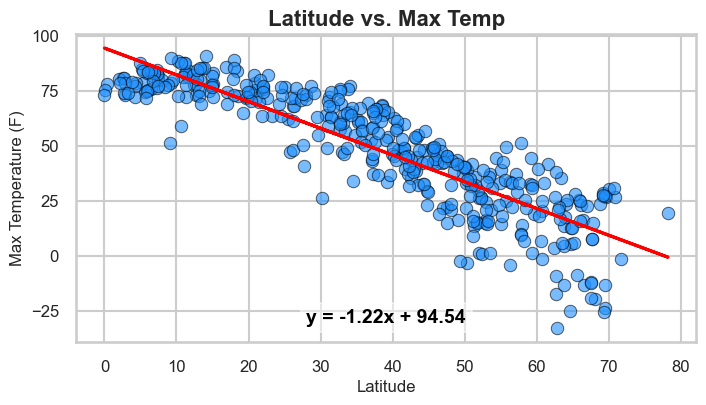

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    title="Latitude vs. Max Temp",
    xlabel="Latitude",
    ylabel="Max Temperature (F)"
)

The r^2-value is: 0.52


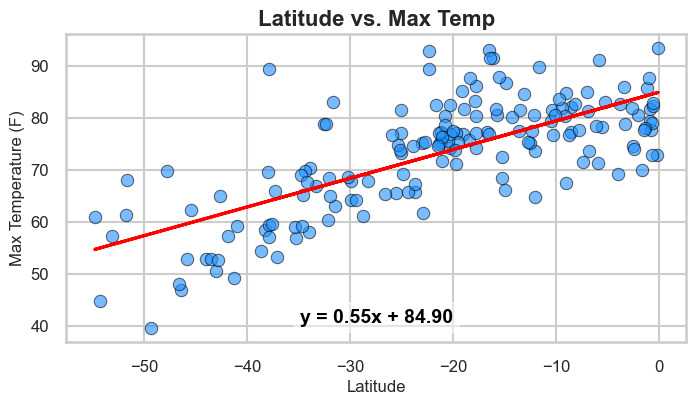

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    title="Latitude vs. Max Temp",
    xlabel="Latitude",
    ylabel="Max Temperature (F)"
)

**Discussion about the linear relationship:** As we can see by the r^2 values of 0.47 and 0.79, as well as the graphs, there is a negative correlation between latitude and temperature. As the latitude gets further from the equator (increasing in the north, decreasing in the south), the temperature drops.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.10


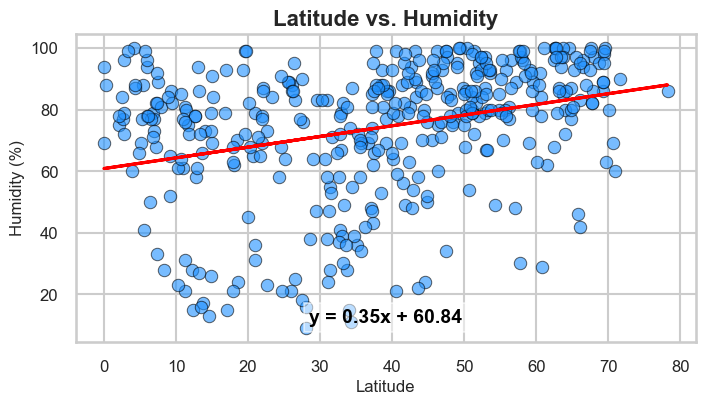

In [17]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    title="Latitude vs. Humidity",
    xlabel="Latitude",
    ylabel="Humidity (%)"
)

The r^2-value is: 0.01


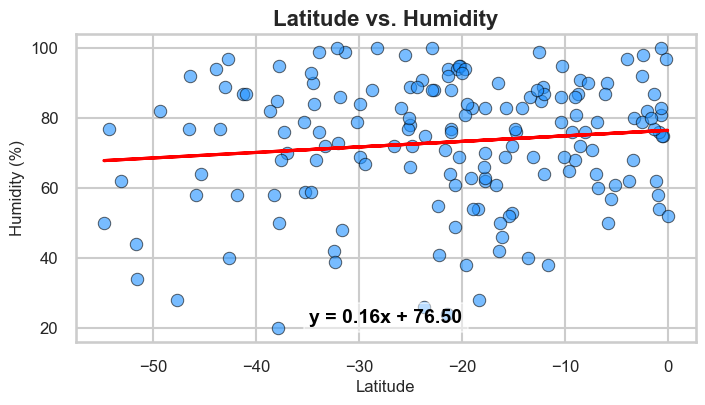

In [18]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    title="Latitude vs. Humidity",
    xlabel="Latitude",
    ylabel="Humidity (%)"
)

**Discussion about the linear relationship:** The r^2-values are low and the plot shows relatively flat lines. To me, this suggests that there is no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.03


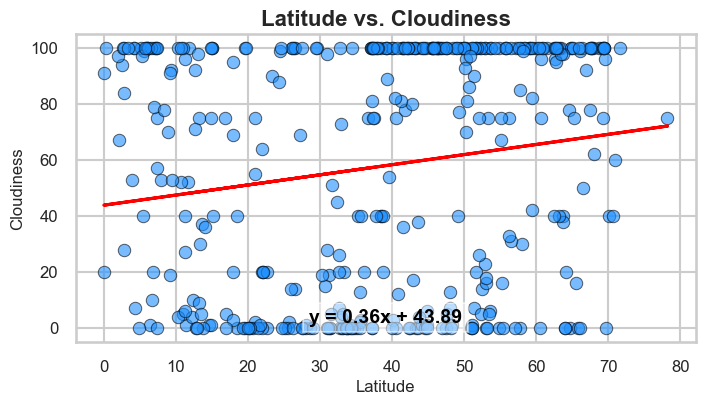

In [19]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    title="Latitude vs. Cloudiness",
    xlabel="Latitude",
    ylabel="Cloudiness"
)

The r^2-value is: 0.03


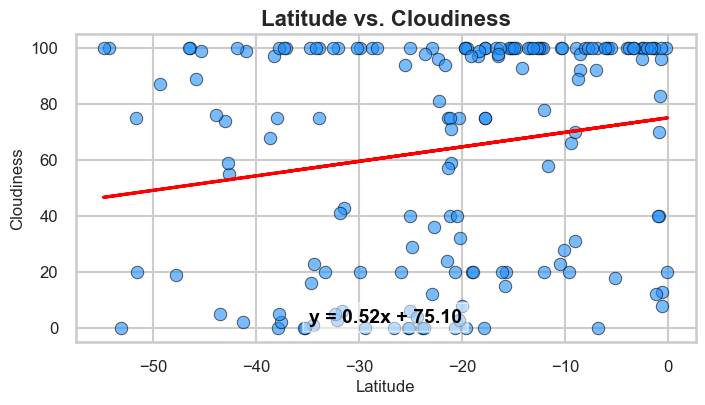

In [20]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    title="Latitude vs. Cloudiness",
    xlabel="Latitude",
    ylabel="Cloudiness"
)

**Discussion about the linear relationship:** Once again, we see low r^2-values. This suggests that there's a weak or no correlation, but I'm leaning more toward no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.03


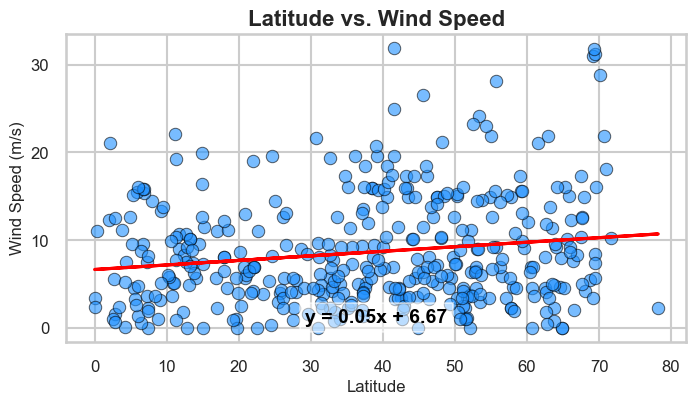

In [21]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    title="Latitude vs. Wind Speed",
    xlabel="Latitude",
    ylabel="Wind Speed (m/s)"
)

The r^2-value is: 0.04


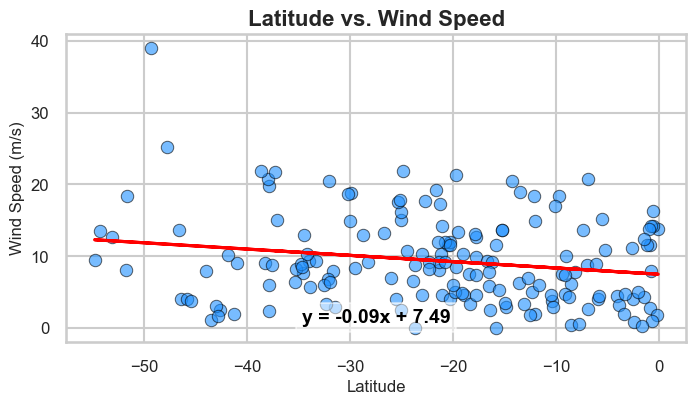

In [22]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    title="Latitude vs. Wind Speed",
    xlabel="Latitude",
    ylabel="Wind Speed (m/s)"
)

**Discussion about the linear relationship:** This once again yields very low r^2-values, so latitude and wind speed likely have no correlation or very low correlation.